<a href="https://colab.research.google.com/github/smkmohsin/hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis_Sheikh_Mohsin_Kader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/'
original_df = pd.read_csv(filepath + 'Hotel Bookings.csv')

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##>First checked the null values in the data set and got this insight:
    children         4  Null Values
    country        488  Null Values
    agent        16340  Null Values
    company     112593  Null Values

##> need to change 'arrival_date_month' dtype to int64
##> need to change 'reservation_status_date' dtype to datetime
##> if needed need to make a new column of dtype datetime
##> 2015, 2016, 2017 data available


In [ ]:
original_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
original_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
original_df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [ ]:
original_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
original_df[['customer_type','lead_time','arrival_date_year', 
            'arrival_date_day_of_month','arrival_date_month',
       'stays_in_week_nights',
       'is_repeated_guest',
'reserved_room_type','assigned_room_type']][79:85]

,customer_type,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_month,stays_in_week_nights,is_repeated_guest,reserved_room_type,assigned_room_type
79,Transient,81,2015,3,July,6,0,D,D
80,Contract,99,2015,3,July,7,0,A,A
81,Contract,368,2015,3,July,7,0,A,A
82,Contract,364,2015,3,July,7,0,A,A
83,Transient,81,2015,3,July,7,0,A,A
84,Contract,99,2015,3,July,7,0,E,E


In [ ]:
original_df[['hotel','reservation_status_date','arrival_date_year',
       'arrival_date_month',
       'arrival_date_day_of_month','customer_type','lead_time','stays_in_weekend_nights',
       'stays_in_week_nights',
       'country', 'market_segment',
       'is_repeated_guest',
'reserved_room_type','assigned_room_type']][79:85]

,hotel,reservation_status_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month,customer_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type
79,Resort Hotel,2015-07-11,2015,July,3,Transient,81,2,6,PRT,Offline TA/TO,0,D,D
80,Resort Hotel,2015-07-12,2015,July,3,Contract,99,2,7,FRA,Offline TA/TO,0,A,A
81,Resort Hotel,2015-05-19,2015,July,3,Contract,368,3,7,PRT,Offline TA/TO,0,A,A
82,Resort Hotel,2015-07-13,2015,July,3,Contract,364,3,7,GBR,Offline TA/TO,0,A,A
83,Resort Hotel,2015-06-09,2015,July,3,Transient,81,3,7,PRT,Direct,0,A,A
84,Resort Hotel,2015-07-13,2015,July,3,Contract,99,3,7,GBR,Offline TA/TO,0,E,E


#Cleaning *Data*

Handling Null values for columns

    children         4  Null Values
    country        488  Null Values
    agent        16340  Null Values
    company     112593  Null Values



In [ ]:
#Make a copy of dataframe before doing any changes
booking_df = original_df.copy()

In [ ]:
#fill children that have null value with 0
booking_df.loc[booking_df['children'].isnull(), 'children'] = 0

In [ ]:
#fill country that have null value with mode of country column
booking_df['country'].fillna(booking_df['country'].mode().to_string(), inplace=True)

In [ ]:
#fill agent that have null value with 0 of agent column
booking_df['agent'].fillna(0, inplace=True)

In [ ]:
#drop company column
booking_df.drop('company', axis=1, inplace=True)

In [ ]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#What are People's preference:
###QUESTIONS:

What type of customers visited the most?

Find out the number or adults(or couples), family, group/friends (Plot graph based on customer type)

Which type of room is in demand?

Find out which days are more busy: weekends or weekdays and how many nights they stayed

Which hotels provided parking facility?

Find out if hotels with parking facility has more number customers 

Which month receives more number of special request each year?



###What type of customers visited the most?

In [ ]:
booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
customer_type_df = booking_df['customer_type'].value_counts().reset_index().rename(columns={'index':'customer_type', 'customer_type': 'count'})
customer_type_df

,customer_type,count
0,Transient,89613
1,Transient-Party,25124
2,Contract,4076
3,Group,577


In [ ]:
# extracting number of customer type
cust_count_values = customer_type_df['count'].values
cust_count_values

array([89613, 25124,  4076,   577])

In [ ]:
# extracting customer type for labelling 
cust_type_labels = customer_type_df['customer_type'].values
cust_type_labels

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

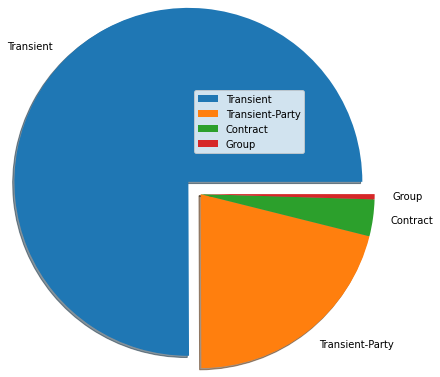

In [ ]:
#Ploting pie plot
myexplode = [0.2, 0, 0, 0]
plt.pie(cust_count_values, labels = cust_type_labels, radius = 2, explode = myexplode, shadow = True)
plt.legend()
plt.show() 

##Find out the number or adults(or couples), family, group/friends (Plot graph based on customer type)

In [ ]:
no_chilren_bool= (booking_df['children'] == 0)

In [ ]:
no_babies_bool = (booking_df['babies'] == 0)

In [ ]:
# Extracting adults those have alteast of kid
family_count_df = booking_df.loc[~no_chilren_bool | ~no_chilren_bool,['adults','children', 'babies']]
family_count_df

,adults,children,babies
13,2,1.0,0
45,2,2.0,0
55,2,2.0,0
65,2,2.0,0
87,2,1.0,0
...,...,...,...
119270,2,1.0,0
119287,2,1.0,0
119293,2,2.0,0
119318,2,1.0,0


In [ ]:
total_adults_in_family_count = family_count_df.adults.sum()
total_adults_in_family_count

16824

In [ ]:
total_kids_in_family_count = family_count_df.children.sum() + family_count_df.babies.sum()
total_kids_in_family_count

12581.0

In [ ]:
family_count = total_adults_in_family_count + total_kids_in_family_count
family_count

29405.0

In [ ]:
adults_count_without_kids_df = booking_df.loc[no_chilren_bool & no_babies_bool]['adults'].value_counts().reset_index().rename(columns={'index':'number_of_members', 'adults': 'count'})

In [ ]:
adults_count_without_kids_df

,number_of_members,count
0,2,81560
1,1,22577
2,3,5666
3,0,180
4,4,59
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


In [ ]:
# Assigning name as per count

for index,row in adults_count_without_kids_df.iterrows():
  if row['number_of_members'] == 1:
    adults_count_without_kids_df.at[index, 'label'] = "Single Person"
  elif row['number_of_members'] == 2:
    adults_count_without_kids_df.at[index, 'label'] =  "Mostly Couples"
  elif row['number_of_members'] >2:
    adults_count_without_kids_df.at[index, 'label'] =  "Group of Adults"
  else:
    adults_count_without_kids_df.at[index, 'label'] = 'No adults'

In [ ]:
adults_count_without_kids_df

,number_of_members,count,label
0,2,81560,Mostly Couples
1,1,22577,Single Person
2,3,5666,Group of Adults
3,0,180,No adults
4,4,59,Group of Adults
5,26,5,Group of Adults
6,27,2,Group of Adults
7,20,2,Group of Adults
8,5,2,Group of Adults
9,55,1,Group of Adults


In [ ]:
adults_count_without_kids_df = adults_count_without_kids_df.groupby('label').sum()
adults_count_without_kids_df

,number_of_members,count
label,,
Group of Adults,246,5741
Mostly Couples,2,81560
No adults,0,180
Single Person,1,22577


In [ ]:
# Drop number_of_members column as we don't need it
adults_count_without_kids_df.drop(labels='number_of_members', axis=1, inplace=True)


#no adults = no kids

In [ ]:
adults_count_without_kids_df.drop(labels='No adults',inplace=True)
adults_count_without_kids_df

,count
label,
Group of Adults,5741
Mostly Couples,81560
Single Person,22577


In [ ]:
member_count_df = adults_count_without_kids_df.copy()
member_count_df.loc[len(adults_count_without_kids_df.index)] = [family_count]

In [ ]:
member_count_df

,count
label,
Group of Adults,5741.0
Mostly Couples,81560.0
Single Person,22577.0
3,29405.0


In [ ]:
member_count_df.rename(index={3:'Family'}, inplace=True)

In [ ]:
member_count_df

,count
label,
Group of Adults,5741.0
Mostly Couples,81560.0
Single Person,22577.0
Family,29405.0


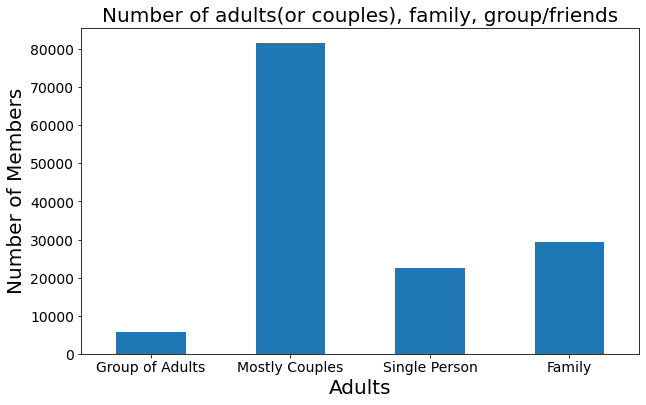

In [ ]:
# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

member_count_df['count'].plot(kind='bar', fontsize = 14)
plt.title('Number of adults(or couples), family, group/friends', fontsize = 20)
plt.ylabel('Number of Members', fontsize = 20)
plt.xlabel('Adults', fontsize = 20)
plt.xticks(rotation=0)
plt.show()

##Which type of room is in demand?

In [ ]:
room_type = booking_df['reserved_room_type'].value_counts().reset_index().rename(columns= {'index':'reserved_room_type', 'reserved_room_type': 'count'})
room_type

,reserved_room_type,count
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6


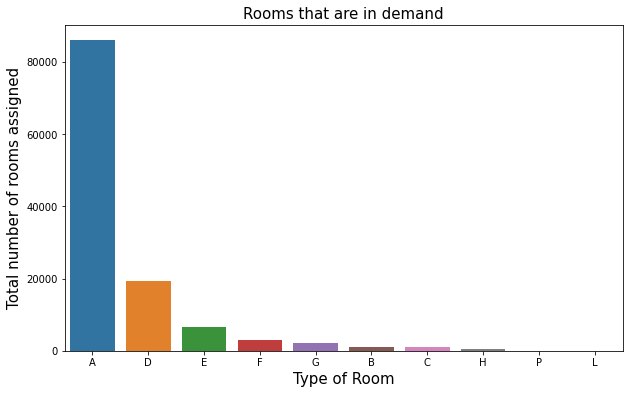

In [ ]:
sns.barplot(x='reserved_room_type', y='count' ,data= room_type,)
plt.title('Rooms that are in demand', fontsize = 15)
plt.ylabel('Total number of rooms assigned', fontsize = 15)
plt.xlabel('Type of Room', fontsize = 15)
plt.show()

#change it to pie change

##Find out which days are more busy: weekends or weekdays and how many nights they stayed

In [ ]:
week_nights_count_df = booking_df[['stays_in_week_nights']].value_counts().reset_index().rename(columns={'stays_in_week_nights': 'Week_nights', 0:'count'})
week_nights_count_df.head()

,Week_nights,count
0,2,33684
1,1,30310
2,3,22258
3,5,11077
4,4,9563


In [ ]:
week_nights_count_df.set_index('Week_nights', inplace=True)

In [ ]:
week_nights_count_df

,count
Week_nights,
2,33684
1,30310
3,22258
5,11077
4,9563
0,7645
6,1499
10,1036
7,1029


Text(0, 0.5, 'Number people stayed')

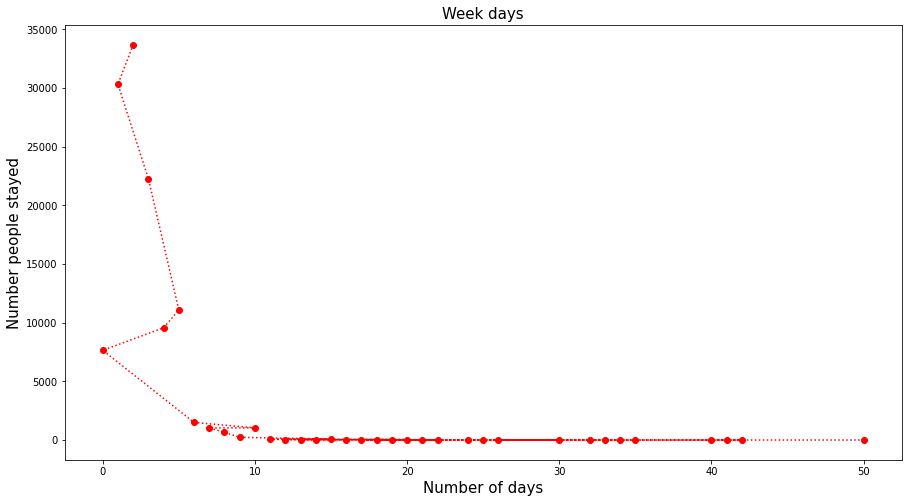

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)

#plot 1:
# x = week_nights_count_df['Week_nights']
# y = week_nights_count_df['count']

# plt.plot(x, 'o:r')
plt.plot(week_nights_count_df, 'o:r')

plt.title('Week days', fontsize = 15)
plt.xlabel('Number of days', fontsize = 15)
plt.ylabel('Number people stayed', fontsize = 15)

In [ ]:
weekend_nights_count_df = booking_df[['stays_in_weekend_nights']].value_counts().reset_index().rename(columns={'stays_in_weekend_nights': 'Weekend_nights', 0:'count'})
weekend_nights_count_df.head()

,Weekend_nights,count
0,0,51998
1,2,33308
2,1,30626
3,4,1855
4,3,1259


In [ ]:
# weekend_nights_count_df.drop(0, axis=0, inplace= True)

In [ ]:
weekend_nights_count_df.set_index('Weekend_nights', inplace=True)

In [ ]:
weekend_nights_count_df

,count
Weekend_nights,
0,51998
2,33308
1,30626
4,1855
3,1259
6,153
5,79
8,60
7,19


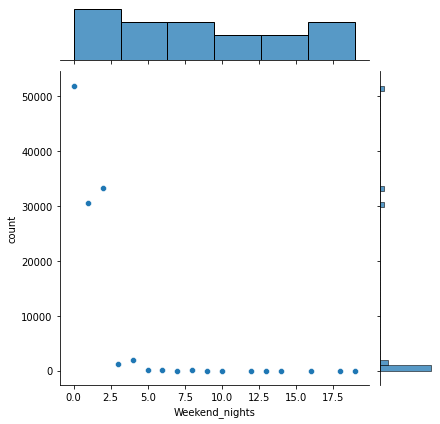

In [ ]:
sns.jointplot(x='Weekend_nights',y='count',data= weekend_nights_count_df)

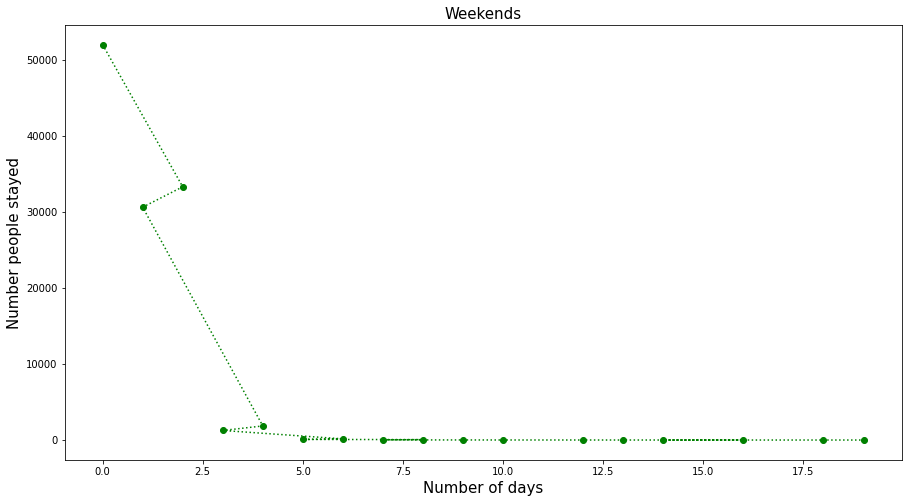

In [ ]:
# x = weekend_nights_count_df['Weekend_nights']
# y = weekend_nights_count_df['count']

plt.plot(weekend_nights_count_df, 'o:g')
plt.title('Weekends', fontsize = 15)
plt.xlabel('Number of days', fontsize = 15)
plt.ylabel('Number people stayed', fontsize = 15)


plt.show()

## Which hotels provided parking facility?


In [ ]:
booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
booking_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [66]:
hotel_parking_df = booking_df.loc[booking_df['is_canceled'] == 0, ['hotel', 'required_car_parking_spaces']]
hotel_parking_df

,hotel,required_car_parking_spaces
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0
...,...,...
119385,City Hotel,0
119386,City Hotel,0
119387,City Hotel,0
119388,City Hotel,0


In [67]:
hotel_with_parking_df = hotel_parking_df[hotel_parking_df['required_car_parking_spaces'] != 0]
hotel_with_parking_df

,hotel,required_car_parking_spaces
25,Resort Hotel,1
29,Resort Hotel,1
53,Resort Hotel,1
54,Resort Hotel,1
55,Resort Hotel,1
...,...,...
119158,City Hotel,1
119198,City Hotel,1
119236,City Hotel,1
119281,City Hotel,1


In [68]:
hotel_parking_count = hotel_with_parking_df[['hotel']].value_counts()
hotel_parking_count

hotel       
Resort Hotel    5490
City Hotel      1926
dtype: int64

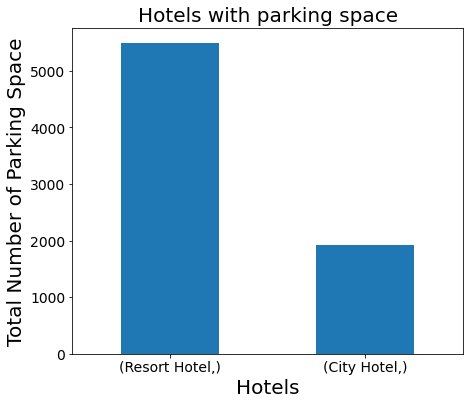

In [69]:
plt.rcParams['figure.figsize'] = (7, 6)


hotel_parking_count.plot(kind='bar', fontsize = 14)
plt.title('Hotels with parking space', fontsize = 20)
plt.ylabel('Total Number of Parking Space', fontsize = 20)
plt.xlabel('Hotels', fontsize = 20)
plt.xticks(rotation=0)
plt.show()


## Find out if hotels with parking facility has more number customers 



In [70]:
hotel_without_parking_df = hotel_parking_df[hotel_parking_df['required_car_parking_spaces'] == 0]
hotel_without_parking_df.head()

,hotel,required_car_parking_spaces
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0


In [71]:
hotel_without_parking_count = hotel_without_parking_df[['hotel']].value_counts()
hotel_without_parking_count

hotel       
City Hotel      44302
Resort Hotel    23448
dtype: int64

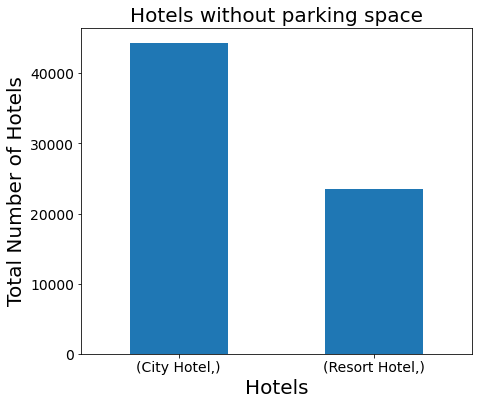

In [72]:
plt.rcParams['figure.figsize'] = (7, 6)


hotel_without_parking_count.plot(kind='bar', fontsize = 14)
plt.title('Hotels without parking space', fontsize = 20)
plt.ylabel('Total Number of Hotels', fontsize = 20)
plt.xlabel('Hotels', fontsize = 20)
plt.xticks(rotation=0)
plt.show()

## Which month receives more number of special request each year?

In [86]:
special_request_of_2015 = booking_df[booking_df['arrival_date_year'] == 2015][['arrival_date_month','total_of_special_requests']]
special_request_of_2015.head()

,arrival_date_month,total_of_special_requests
0,July,0
1,July,0
2,July,0
3,July,0
4,July,1


In [90]:
special_request_2015_month_wise = special_request_of_2015.groupby('arrival_date_month')['total_of_special_requests'].sum()
special_request_2015_month_wise

arrival_date_month
August       2188
December     1392
July         1226
November      950
October      1953
September    1869
Name: total_of_special_requests, dtype: int64

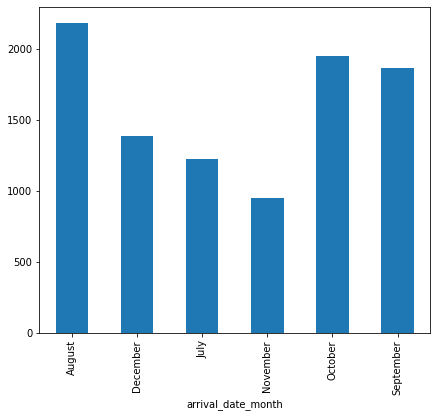

In [91]:
special_request_2015_month_wise.plot(kind='bar')

In [87]:
special_request_of_2016 = booking_df[booking_df['arrival_date_year'] == 2016][['arrival_date_month','total_of_special_requests']]
special_request_of_2016.head()

,arrival_date_month,total_of_special_requests
3738,January,1
3739,January,1
3740,January,1
3741,January,2
3742,January,0


In [89]:
special_request_of_2017 = booking_df[booking_df['arrival_date_year'] == 2017][['arrival_date_month','total_of_special_requests']]
special_request_of_2017.head()

,arrival_date_month,total_of_special_requests
9775,January,0
9776,January,1
9777,January,1
9778,January,1
9779,January,1
